In [65]:

#Import relevant libraries and define settings for plotting.#Import r 
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

sns.set()
pal = sns.hls_palette(10, h=.5)
sns.set_palette(pal)

#Avoid display of scientific notation and show precision of 4 decimals:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [66]:
df_uber = pd.read_csv('C:/Users/shubhangipatil/Desktop/UBER/driver_trips.csv', parse_dates=['request_time'], infer_datetime_format=True)

df_rider = pd.read_csv('C:/Users/shubhangipatil/Desktop/UBER/rider_trips.csv', parse_dates=['request_time'], infer_datetime_format=True)

In [67]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59854 entries, 0 to 59853
Data columns (total 9 columns):
trip_id                   59854 non-null object
driver_id                 59854 non-null object
trip_status               59854 non-null object
actual_time_to_arrival    53583 non-null float64
request_time              59854 non-null datetime64[ns]
surge_multiplier          59854 non-null float64
driver payout             59854 non-null float64
start_geo                 59854 non-null object
end_geo                   59854 non-null object
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 4.1+ MB


In [68]:
df_rider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 10 columns):
trip_id                      60000 non-null object
rider_id                     60000 non-null object
trip_status                  60000 non-null object
estimated_time_to_arrival    57499 non-null float64
request_time                 60000 non-null datetime64[ns]
surge_multiplier             60000 non-null float64
trip_price_pre_discount      60000 non-null float64
rider_payment                60000 non-null float64
start_geo                    60000 non-null object
end_geo                      60000 non-null object
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 4.6+ MB


In [69]:
df=df_uber.drop(df_uber.columns[df_uber.columns.str.contains('Unnamed',case = True)],axis = 1)

In [70]:
#CLEANING DATA

In [71]:
#There are 0 duplicated rows (this takes a while to run):
dup=len(df[df.duplicated() == True])
dup

0

In [72]:
rider =len(df_rider[df_rider.duplicated() == True])
rider

0

In [73]:
#Checking null values
df.isnull().any() 

trip_id                   False
driver_id                 False
trip_status               False
actual_time_to_arrival     True
request_time              False
surge_multiplier          False
driver payout             False
start_geo                 False
end_geo                   False
dtype: bool

In [75]:
df_rider.isnull().any()

trip_id                      False
rider_id                     False
trip_status                  False
estimated_time_to_arrival     True
request_time                 False
surge_multiplier             False
trip_price_pre_discount      False
rider_payment                False
start_geo                    False
end_geo                      False
dtype: bool

In [76]:
startloc = df.start_geo.unique() #4 unique start geo locations
startloc

array(['Allen Abby', 'Blair Bend', 'Chelsea Court', 'Daisy Drive'],
      dtype=object)

In [77]:
destloc  =  df.end_geo.unique() #4 unique destination geo locations, same as start geo locations
destloc

array(['Chelsea Court', 'Blair Bend', 'Daisy Drive', 'Allen Abby'],
      dtype=object)

In [78]:
#Check some of the data with missing destination. 
#One idea to fill missing values would be predict destination based on the other features.
df[df.actual_time_to_arrival.isnull()].head()

trip_id  driver_id     trip_status  actual_time_to_arrival  \
4   921a-11d3  4e79-a40f       completed                     nan   
13  808d-46aa  4bf5-8ff9  rider_canceled                     nan   
21  8f14-9407  45cf-4b7c  rider_canceled                     nan   
33  987d-9509  4e79-a40f       completed                     nan   
41  ae7e-3b43  445e-dd18  rider_canceled                     nan   

          request_time  surge_multiplier  driver payout      start_geo  \
4  2012-04-30 16:44:00            1.0000        11.8100    Daisy Drive   
13 2012-05-03 10:26:00            1.0000         0.0000  Chelsea Court   
21 2012-04-09 15:12:00            1.0000         0.0000     Blair Bend   
33 2012-05-06 18:48:00            1.0000        70.7800  Chelsea Court   
41 2012-04-22 13:05:00            1.0000         0.0000     Blair Bend   

          end_geo  
4     Daisy Drive  
13  Chelsea Court  
21  Chelsea Court  
33  Chelsea Court  
41     Blair Bend

In [79]:
df_rider[df_rider.estimated_time_to_arrival.isnull()].head()

trip_id   rider_id trip_status  estimated_time_to_arrival  \
4   921a-11d3  a0b5-fbfc   completed                        nan   
33  987d-9509  b845-c8da   completed                        nan   
59  bd1a-b59f  2626-72af   completed                        nan   
67  90c4-0751  10d8-e09a   completed                        nan   
68  82a2-c586  6f66-e3fc   completed                        nan   

          request_time  surge_multiplier  trip_price_pre_discount  \
4  2012-04-30 16:44:00            1.0000                  14.7600   
33 2012-05-06 18:48:00            1.0000                  88.4720   
59 2012-05-05 17:43:00            1.0000                  26.8240   
67 2012-04-23 11:26:00            1.0000                  31.6160   
68 2012-04-25 23:33:00            1.0000                  17.1920   

    rider_payment      start_geo        end_geo  
4         14.7600    Daisy Drive    Daisy Drive  
33        88.4720  Chelsea Court  Chelsea Court  
59        26.8240  Chelsea Court  Chelsea Court  
67        31.6160  Chelsea Court  Chelsea Court  
68        17.1920    Daisy Drive    Daisy Drive

In [80]:
#Parsing date, day, month, weekday, time and hour in separate columns

df['Date'] = df.request_time.dt.date
df['Month'] = df.request_time.dt.month
df['Day'] = df.request_time.dt.day
df['Weekday'] = df.request_time.dt.dayofweek
df['Time'] = df.request_time.dt.time
df['Hour'] = df.request_time.dt.hour 

In [81]:
#Parsing date, day, month, weekday, time and hour in separate columns

df_rider['Date'] = df_rider.request_time.dt.date
df_rider['Month'] = df_rider.request_time.dt.month
df_rider['Day'] = df_rider.request_time.dt.day
df_rider['Weekday'] = df_rider.request_time.dt.dayofweek
df_rider['Time'] = df_rider.request_time.dt.time
df_rider['Hour'] = df_rider.request_time.dt.hour 

In [82]:
#Data for driver trips encompasses exactly 27 days from April 9th, 2012 to May 6th, 2012.
beginning = df.request_time.min()
end = df.request_time.max()
print (beginning, end, end - beginning)

2012-04-09 00:00:00 2012-05-06 23:55:00 27 days 23:55:00


In [83]:
#Data for rider trips encompasses exactly 27 days from April 9th, 2012 to May 6th, 2012.
beginning = df_rider.request_time.min()
end = df_rider.request_time.max()
print (beginning, end, end - beginning)

2012-04-09 00:00:00 2012-05-06 23:55:00 27 days 23:55:00


In [84]:
#Get all federal holidays in the period
from pandas.tseries.holiday import USFederalHolidayCalendar

#if return_name is True, then name is series value and date is the series index, otherwise date is series value.
holidays = USFederalHolidayCalendar().holidays(beginning, end, return_name = True) 
holidays

#No holidays displayed as there are none from specified dates of April to May

Series([], dtype: object)

In [85]:
df.Weekday.value_counts () #Monday = 0, Sunday = 6

5    11239
4    10022
3     9039
6     8040
2     7679
1     7147
0     6688
Name: Weekday, dtype: int64

In [86]:
df_rider.Weekday.value_counts()

5    11254
4    10045
3     9065
6     8065
2     7702
1     7166
0     6703
Name: Weekday, dtype: int64

In [87]:
#From above two we can see that rides called by riders are more than rides given by drivers, there is no dramatic increase
#it might be some rides are cancelled, but we can see that we do need to make recommendations to provide better facilities to drivers

In [88]:
df.head()

trip_id  driver_id trip_status  actual_time_to_arrival  \
0  b3cb-b9bf  4649-2f0a   completed                  3.5200   
1  8569-0fbf  4003-e2e7   completed                  2.6300   
2  86f2-e4cc  44af-7b74   completed                  1.3300   
3  aef6-924e  4909-aa90   completed                  1.7000   
4  921a-11d3  4e79-a40f   completed                     nan   

         request_time  surge_multiplier  driver payout      start_geo  \
0 2012-04-09 06:12:00            1.0000         4.2400     Allen Abby   
1 2012-05-06 05:44:00            2.0000         8.2400     Blair Bend   
2 2012-04-25 11:28:00            1.0000         6.2000  Chelsea Court   
3 2012-04-27 21:34:00            1.0000         8.1900  Chelsea Court   
4 2012-04-30 16:44:00            1.0000        11.8100    Daisy Drive   

         end_geo        Date  Month  Day  Weekday      Time  Hour  
0  Chelsea Court  2012-04-09      4    9        0  06:12:00     6  
1  Chelsea Court  2012-05-06      5    6        6  05:44:00     5  
2     Blair Bend  2012-04-25      4   25        2  11:28:00    11  
3    Daisy Drive  2012-04-27      4   27        4  21:34:00    21  
4    Daisy Drive  2012-04-30      4   30        0  16:44:00    16

In [89]:
df_rider.head()

trip_id   rider_id trip_status  estimated_time_to_arrival  \
0  b3cb-b9bf  5ba9-cd29   completed                     4.4800   
1  8569-0fbf  b8ed-f739   completed                     4.6800   
2  86f2-e4cc  a12d-275f   completed                     1.9800   
3  aef6-924e  14af-2a91   completed                     2.7500   
4  921a-11d3  a0b5-fbfc   completed                        nan   

         request_time  surge_multiplier  trip_price_pre_discount  \
0 2012-04-09 06:12:00            1.0000                   5.2960   
1 2012-05-06 05:44:00            2.0000                  10.3040   
2 2012-04-25 11:28:00            1.0000                   7.7440   
3 2012-04-27 21:34:00            1.0000                  10.2320   
4 2012-04-30 16:44:00            1.0000                  14.7600   

   rider_payment      start_geo        end_geo        Date  Month  Day  \
0         5.2960     Allen Abby  Chelsea Court  2012-04-09      4    9   
1        10.3040     Blair Bend  Chelsea Court  2012-05-06      5    6   
2         7.7440  Chelsea Court     Blair Bend  2012-04-25      4   25   
3        10.2320  Chelsea Court    Daisy Drive  2012-04-27      4   27   
4        14.7600    Daisy Drive    Daisy Drive  2012-04-30      4   30   

   Weekday      Time  Hour  
0        0  06:12:00     6  
1        6  05:44:00     5  
2        2  11:28:00    11  
3        4  21:34:00    21  
4        0  16:44:00    16

In [90]:
dfnew=df
dfnewrider=df_rider

In [91]:
#Get the mean duration for each start_geo and end_geo pair to fill null values of actual_time_to_arrival
df_Dur = df.groupby(['start_geo', 'end_geo'])[['actual_time_to_arrival']].mean()

df_Dur_ride=df_rider.groupby(['start_geo','end_geo'])[['estimated_time_to_arrival']].mean()

In [92]:
print(df_Dur) #driver duration from one point to another
print(df_Dur_ride) #rider estimated time to arrival from one point to another

#From below data we can observe time is not being accurately predicted to the rider, and due to this reason some rides may be cancelled on riders end.


                             actual_time_to_arrival
start_geo     end_geo                              
Allen Abby    Allen Abby                     2.6986
              Blair Bend                     2.8822
              Chelsea Court                  2.7579
              Daisy Drive                    2.6979
Blair Bend    Allen Abby                     3.9695
              Blair Bend                     4.2824
              Chelsea Court                  3.6911
              Daisy Drive                    3.6335
Chelsea Court Allen Abby                     2.6034
              Blair Bend                     2.8655
              Chelsea Court                  2.4701
              Daisy Drive                    2.7013
Daisy Drive   Allen Abby                     2.7441
              Blair Bend                     2.8472
              Chelsea Court                  2.5585
              Daisy Drive                    2.7913
                             estimated_time_to_arrival
start_geo

In [93]:
#Replace missing values with the average duration for the respective actual_time_to_arrival 
dfmiss=df[df.actual_time_to_arrival.isnull()]
dfmiss.head()

trip_id  driver_id     trip_status  actual_time_to_arrival  \
4   921a-11d3  4e79-a40f       completed                     nan   
13  808d-46aa  4bf5-8ff9  rider_canceled                     nan   
21  8f14-9407  45cf-4b7c  rider_canceled                     nan   
33  987d-9509  4e79-a40f       completed                     nan   
41  ae7e-3b43  445e-dd18  rider_canceled                     nan   

          request_time  surge_multiplier  driver payout      start_geo  \
4  2012-04-30 16:44:00            1.0000        11.8100    Daisy Drive   
13 2012-05-03 10:26:00            1.0000         0.0000  Chelsea Court   
21 2012-04-09 15:12:00            1.0000         0.0000     Blair Bend   
33 2012-05-06 18:48:00            1.0000        70.7800  Chelsea Court   
41 2012-04-22 13:05:00            1.0000         0.0000     Blair Bend   

          end_geo        Date  Month  Day  Weekday      Time  Hour  
4     Daisy Drive  2012-04-30      4   30        0  16:44:00    16  
13  Chelsea Court  2012-05-03      5    3        3  10:26:00    10  
21  Chelsea Court  2012-04-09      4    9        0  15:12:00    15  
33  Chelsea Court  2012-05-06      5    6        6  18:48:00    18  
41     Blair Bend  2012-04-22      4   22        6  13:05:00    13

In [94]:
#for i in dfnew.index:
    #orig = dfnew.loc[i, 'start_geo']
    #dest = dfnew.loc[i, 'end_geo']
    #dfnew.loc[i, 'actual_time_to_arrival'] = df_Dur.loc[orig, dest].actual_time_to_arrival

In [95]:
#Fill null values with mean values of the actual_time_to_arrival column

df['actual_time_to_arrival'] = df['actual_time_to_arrival'].fillna(df['actual_time_to_arrival'].mean()) 

df.head()

trip_id  driver_id trip_status  actual_time_to_arrival  \
0  b3cb-b9bf  4649-2f0a   completed                  3.5200   
1  8569-0fbf  4003-e2e7   completed                  2.6300   
2  86f2-e4cc  44af-7b74   completed                  1.3300   
3  aef6-924e  4909-aa90   completed                  1.7000   
4  921a-11d3  4e79-a40f   completed                  2.6751   

         request_time  surge_multiplier  driver payout      start_geo  \
0 2012-04-09 06:12:00            1.0000         4.2400     Allen Abby   
1 2012-05-06 05:44:00            2.0000         8.2400     Blair Bend   
2 2012-04-25 11:28:00            1.0000         6.2000  Chelsea Court   
3 2012-04-27 21:34:00            1.0000         8.1900  Chelsea Court   
4 2012-04-30 16:44:00            1.0000        11.8100    Daisy Drive   

         end_geo        Date  Month  Day  Weekday      Time  Hour  
0  Chelsea Court  2012-04-09      4    9        0  06:12:00     6  
1  Chelsea Court  2012-05-06      5    6        6  05:44:00     5  
2     Blair Bend  2012-04-25      4   25        2  11:28:00    11  
3    Daisy Drive  2012-04-27      4   27        4  21:34:00    21  
4    Daisy Drive  2012-04-30      4   30        0  16:44:00    16

In [96]:
#Fill null values with mean values of the actual_time_to_arrival column

df_rider['estimated_time_to_arrival'] = df_rider['estimated_time_to_arrival'].fillna(df_rider['estimated_time_to_arrival'].mean()) 

df_rider.head()

trip_id   rider_id trip_status  estimated_time_to_arrival  \
0  b3cb-b9bf  5ba9-cd29   completed                     4.4800   
1  8569-0fbf  b8ed-f739   completed                     4.6800   
2  86f2-e4cc  a12d-275f   completed                     1.9800   
3  aef6-924e  14af-2a91   completed                     2.7500   
4  921a-11d3  a0b5-fbfc   completed                     3.2709   

         request_time  surge_multiplier  trip_price_pre_discount  \
0 2012-04-09 06:12:00            1.0000                   5.2960   
1 2012-05-06 05:44:00            2.0000                  10.3040   
2 2012-04-25 11:28:00            1.0000                   7.7440   
3 2012-04-27 21:34:00            1.0000                  10.2320   
4 2012-04-30 16:44:00            1.0000                  14.7600   

   rider_payment      start_geo        end_geo        Date  Month  Day  \
0         5.2960     Allen Abby  Chelsea Court  2012-04-09      4    9   
1        10.3040     Blair Bend  Chelsea Court  2012-05-06      5    6   
2         7.7440  Chelsea Court     Blair Bend  2012-04-25      4   25   
3        10.2320  Chelsea Court    Daisy Drive  2012-04-27      4   27   
4        14.7600    Daisy Drive    Daisy Drive  2012-04-30      4   30   

   Weekday      Time  Hour  
0        0  06:12:00     6  
1        6  05:44:00     5  
2        2  11:28:00    11  
3        4  21:34:00    21  
4        0  16:44:00    16

In [97]:
# Filter Dataset, Define Functions, and Load Methods to be Used to Create Visualizations.

In [98]:
#Descriptive statistics for numerical features:
df_statistics=df[[ 'actual_time_to_arrival', 'driver payout']].describe()
df_statistics

actual_time_to_arrival  driver payout
count              59854.0000     59854.0000
mean                   2.6751         6.0963
std                    2.4458         4.8174
min                    0.0200         0.0000
25%                    0.8200         4.2400
50%                    2.3300         4.9400
75%                    3.5300         7.0600
max                   70.3200       175.8700

In [99]:
#Descriptive statistics for numerical features:
df_statistics=round(df_rider[[ 'estimated_time_to_arrival', 'rider_payment','trip_price_pre_discount']].describe(),2)
df_statistics

estimated_time_to_arrival  rider_payment  trip_price_pre_discount
count                 60000.0000     60000.0000               60000.0000
mean                      3.2700         7.5500                   7.6000
std                       2.1000         6.0000                   6.0300
min                       0.0200         0.0000                   0.0000
25%                       1.7800         5.3000                   5.3000
50%                       2.9300         6.1200                   6.1700
75%                       4.2500         8.7000                   8.8100
max                      53.4200       219.8300                 219.8300

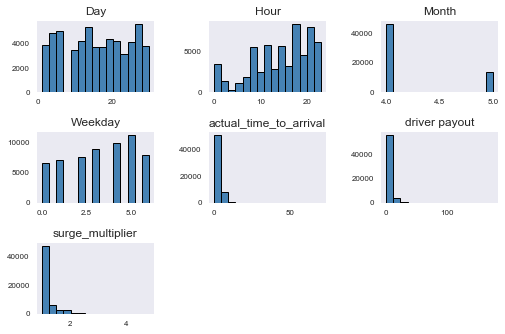

In [100]:
#Visualizing numeric data using pandas for univariate analysis
#Visualizing variables as one-dimensional data
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

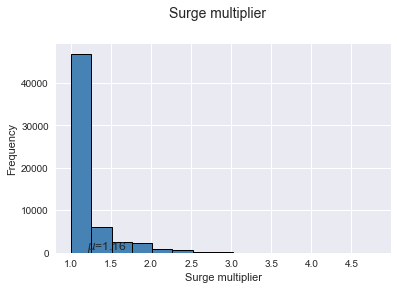

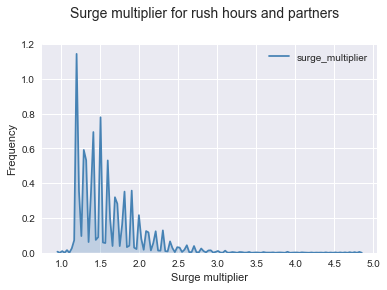

In [36]:
#Visualizing continuous value-best with histogram or density plot

#Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Surge multiplier", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Surge multiplier")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['surge_multiplier'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['surge_multiplier'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Surge multiplier for rush hours and partners", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Surge multiplier")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df['surge_multiplier'], ax=ax1, shade=True, color='steelblue')

#Right skew for the distribution

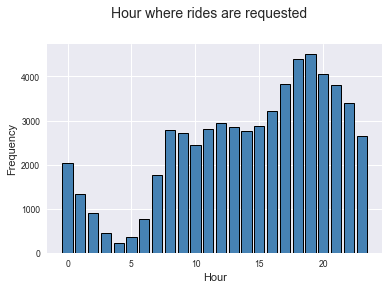

In [37]:
#Discrete categorical data distribution using bar plots


# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Hour where rides are requested", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Hour")
ax.set_ylabel("Frequency") 
w_q = df['Hour'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', edgecolor='black', linewidth=1)

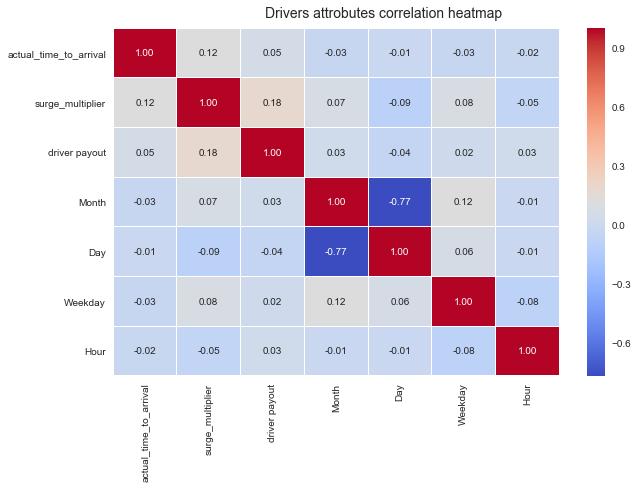

In [38]:
#Check for relationships among various attributes using pair-wise correlation matrix and a heatmap

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Drivers attrobutes correlation heatmap', fontsize=14)

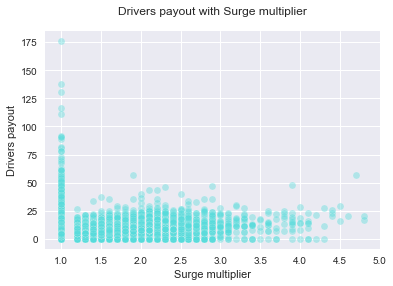

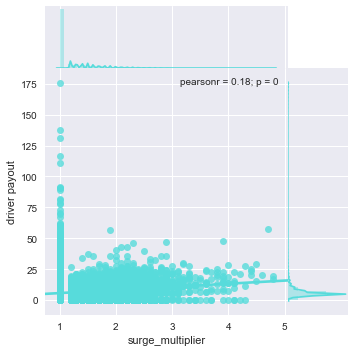

In [39]:
#Scatter plots to check for patterns, relationships but also see indiviual contributions for the attributes

# Scatter Plot
plt.scatter(df['surge_multiplier'], df['driver payout'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Surge multiplier')
plt.ylabel('Drivers payout')
plt.title('Drivers payout with Surge multiplier',y=1.05)


# Joint Plot
jp = sns.jointplot(x='surge_multiplier', y='driver payout', data=df,
                   kind='reg', space=0, size=5, ratio=4)

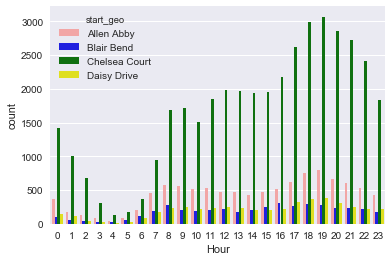

In [40]:
#Visualize categorial data 
# Multi-bar Plot
#Visualize different locations traffic with respect to hour
cp = sns.countplot(x="Hour", hue="start_geo", data=df, palette={"Allen Abby": "#FF9999", "Blair Bend": "#0000FF","Daisy Drive":"#FFFF00","Chelsea Court":"#008000"})

Text(0,0.5,'Drivers payment')

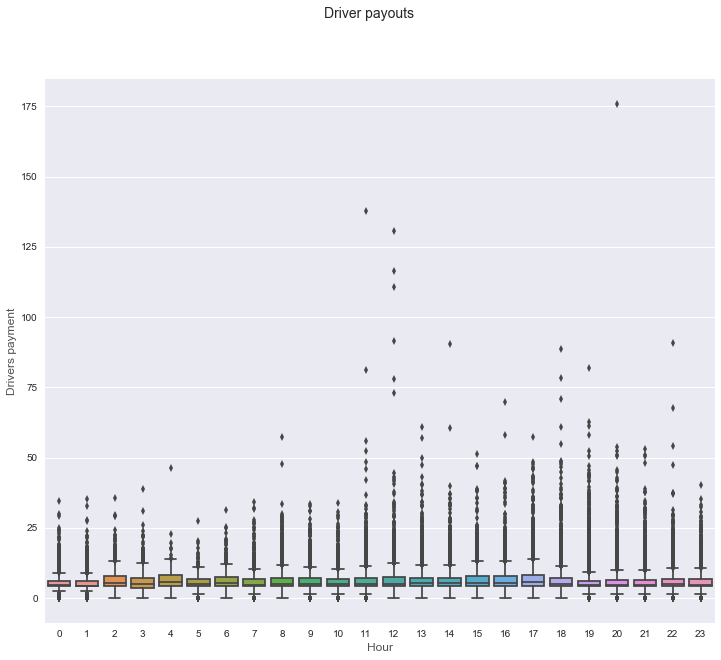

In [41]:
#Box plots for numeric data based on different values in categorical data. Quartile values in data and also outliers
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 10))
f.suptitle('Driver payouts', fontsize=14)

sns.boxplot(x="Hour", y="driver payout", data=df,  ax=ax)
ax.set_xlabel("Hour",size = 12,alpha=0.8)
ax.set_ylabel("Drivers payment",size = 12,alpha=0.8)

In [42]:
#Required by Plotly:
import matplotlib.mlab as mlab
import plotly.plotly as py

In [43]:
from matplotlib.ticker import FuncFormatter #Call formatter function to format tick values
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox) #Create image box
from matplotlib._png import read_png #Load png file
from matplotlib.patches import Ellipse #Draw ellipse

In [44]:
#Create functions to format tick numbers
def thousands_comma(x, pos):
    """
    Args are the value and tick position. 
    Returns number with thousands comma and no decimals.
    """
    return '{:,.0f}'.format(x) #this is the new syntax for formatting

In [45]:
def thousands_format(x, pos):
    """
    Args are the value and tick position. 
    Returns number of thousands with one decimal, and K in lieu of 3 zeros.
    """
    return '{:.0f}{}'.format(x * 1e-3, 'K') #old syntax: '%1.0fK' % (x * 1e-3)

In [46]:
def thousands_currency(x, pos):
    """
    Args are the value and tick position. 
    Returns number of thousands with a $ sign, K in lieu of 3 zeros, and no decimals.
    """
    return '{:.0s}{}'.format('$', x * 1e-3, 'K')

In [47]:
#Define robust function to automatically add annotated labels on bar plots.
#Inspiration from http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/

def annotate_labels(ax, labels_list, **kwargs):
    """
    Function to automatically add labels on bar charts.
    It takes a plot axis, an ordered list of labels, and text kwargs.
    """
    
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    rects = ax.patches

    for rect, label in zip(rects, labels_list):
        height = rect.get_height()
        p_height = (height / y_height) # Fraction of axis height taken up by this rectangle
        label_position = height + (y_height * 0.01)
        
        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column (or else, change ylim)
        #if p_height > 0.95:
        #    label_position = height - (y_height * 0.05)
        #else:
        #    label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position, label, kwargs)
    return None

In [48]:
#Visualizing the demand: number of Uber trips per day.
len(df[(df.Month==4)|(df.Month==5)])
#Create a plotting dataframe with counts (number of trips) grouped by day:#Create  
byDate = df.groupby('Date')['trip_id'].count()
byDate

#Not much spike but there is a high demand on 2012-04-28 which might be due to special events in a particular city

Date
2012-04-09    1750
2012-04-10    1735
2012-04-11    1811
2012-04-12    2408
2012-04-13    2618
2012-04-14    2766
2012-04-15    2118
2012-04-16    1649
2012-04-17    1821
2012-04-18    1933
2012-04-19    2113
2012-04-20    2318
2012-04-21    2448
2012-04-22    1807
2012-04-23    1490
2012-04-24    1691
2012-04-25    1926
2012-04-26    2214
2012-04-27    2515
2012-04-28    3094
2012-04-29    1992
2012-04-30    1799
2012-05-01    1900
2012-05-02    2009
2012-05-03    2304
2012-05-04    2571
2012-05-05    2931
2012-05-06    2123
Name: trip_id, dtype: int64

In [49]:
#Visualizing the demand: number of Uber trips per day.
len(df_rider[(df_rider.Month==4)|(df_rider.Month==5)])
#Create a plotting dataframe with counts (number of trips) grouped by day:#Create  
byDaterider = df_rider.groupby('Date')['trip_id'].count()
byDaterider

#Not much spike but there is a high demand on 2012-04-28 which might be due to special events in a particular city

#there are many rides missed by drivers

Date
2012-04-09    1752
2012-04-10    1738
2012-04-11    1814
2012-04-12    2418
2012-04-13    2625
2012-04-14    2772
2012-04-15    2126
2012-04-16    1653
2012-04-17    1826
2012-04-18    1939
2012-04-19    2118
2012-04-20    2321
2012-04-21    2450
2012-04-22    1814
2012-04-23    1497
2012-04-24    1697
2012-04-25    1930
2012-04-26    2218
2012-04-27    2518
2012-04-28    3100
2012-04-29    1998
2012-04-30    1801
2012-05-01    1905
2012-05-02    2019
2012-05-03    2311
2012-05-04    2581
2012-05-05    2932
2012-05-06    2127
Name: trip_id, dtype: int64

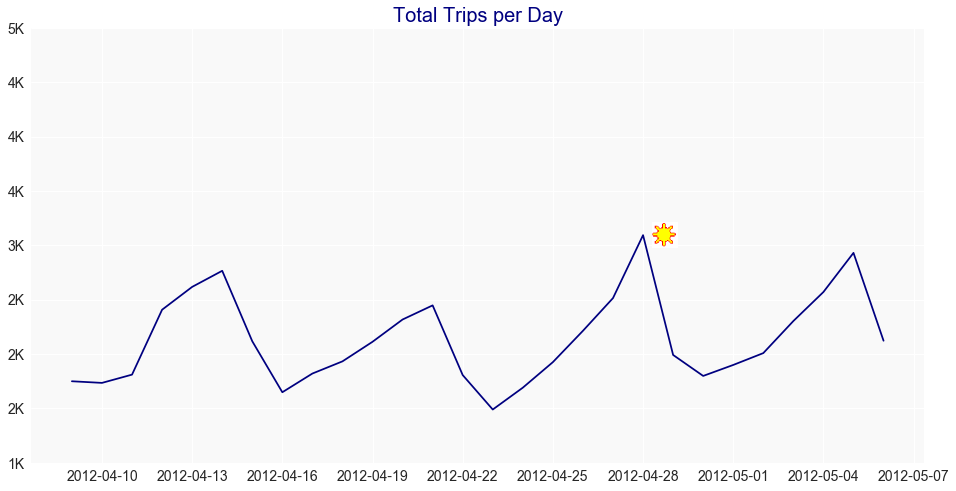

In [50]:

#Create a plot with the total number of trips per day, highlighting some changepoints associated with major holidays #Create a 
#and other weather and touristic/cultural events.

fig = plt.figure()

ax = byDate.plot(figsize = (16, 8), fontsize = 12, ylim = (1000, 5000), color = 'navy')

formatter = FuncFormatter(thousands_format)
ax.yaxis.set_major_formatter(formatter)
ax.set_facecolor('#F9F9F9') #make background color a lighter gray to better contrast with the icon's images.

plt.title('Total Trips per Day', fontsize= 20, color='navy')
plt.tick_params(labelsize=14)
plt.xlabel('')

#Add icon to indicate high temperature in the city:

img1 = read_png('C:/Users/shubhangipatil/Desktop/UBER/sunny.PNG')
imagebox = OffsetImage(img1, zoom=0.6)
xy = ['2012-04-28', 3000] # (len(byDate[:'2015-01-27'])-1, byDate['2015-01-27'])

ab = AnnotationBbox(imagebox, xy, 
                    xybox=(22., 10.), #position from xy to lower left corner of box
                    xycoords='data', #will use data coordinates for x and y
                    boxcoords='offset points', #same idea as textcoords, in points from lower left corner
                    pad=0.1, frameon=False) #padding around the image
ax.add_artist(ab)

plt.show()
#plot_url = py.plot_mpl(fig)

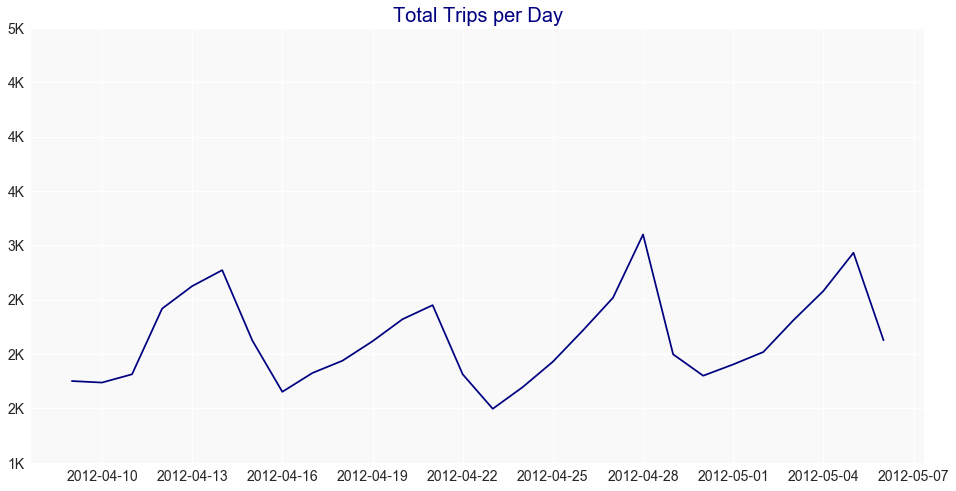

In [51]:

#Create a plot with the total number of trips per day, highlighting some changepoints associated with major holidays #Create a 
#and other weather and touristic/cultural events.

fig = plt.figure()

ax = byDaterider.plot(figsize = (16, 8), fontsize = 12, ylim = (1000, 5000), color = 'navy')


formatter = FuncFormatter(thousands_format)
ax.yaxis.set_major_formatter(formatter)
ax.set_facecolor('#F9F9F9') #make background color a lighter gray to better contrast with the icon's images.

plt.title('Total Trips per Day', fontsize= 20, color='navy')
plt.tick_params(labelsize=14)
plt.xlabel('')

#Add icon to indicate high temperature in the city:



plt.show()
#plot_url = py.plot_mpl(fig)

#there is no much difference between trips made by riders and trips given by drivers, but have to consider that this is just a small portion of data and a overall population might reveal different results


In [52]:
#The effect of time on demand for Uber rides: distribution per hour, weekday and month

weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_labels = ['Apr', 'May']

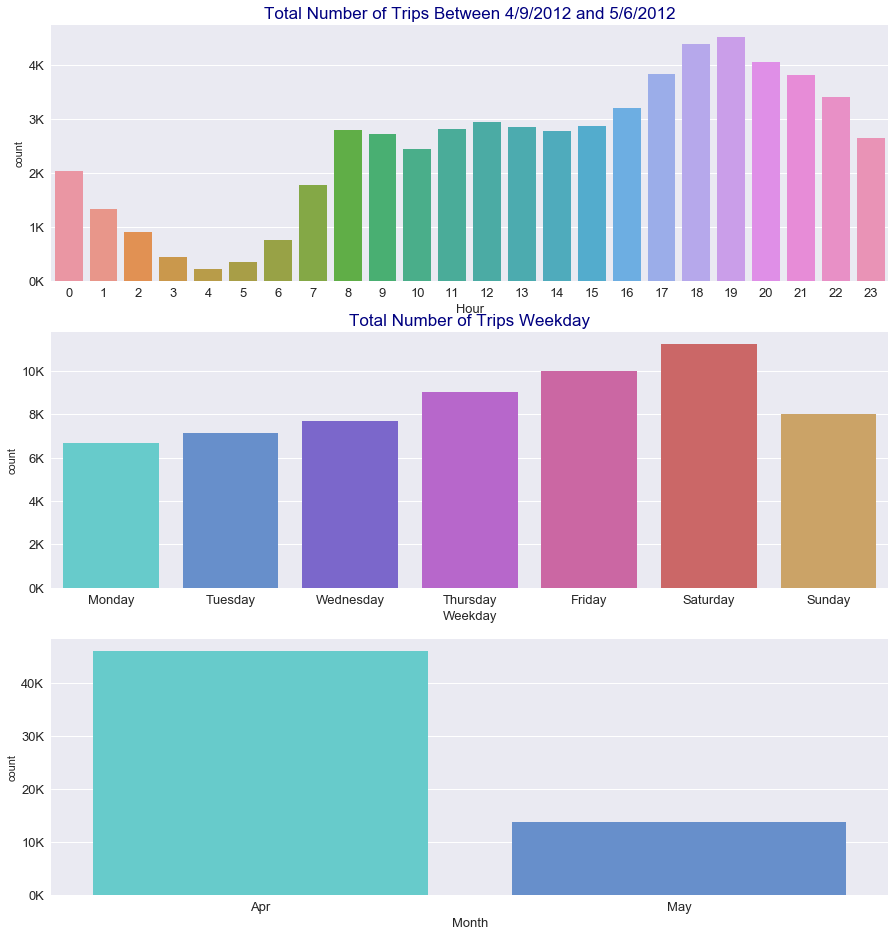

In [53]:

# Create plots comparing demand per different time categories:# Create  
fig = plt.figure(figsize = (15,16))
formatter = FuncFormatter(thousands_format)

plt.subplot(3,1,1) 
ax1 = sns.countplot(df.Hour, order = range(24))
ax1.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.title('Total Number of Trips Between 4/9/2012 and 5/6/2012', fontsize=17, color='navy')
plt.xlabel('Hour', fontsize=13)

plt.subplot(3,1,2)
ax2 = sns.countplot(df.Weekday, order = range(7))
ax2.set_xticklabels(weekday_labels)
ax2.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.title('Total Number of Trips Weekday', fontsize=17, color='navy')
plt.xlabel('Weekday',fontsize=13)

plt.subplot(3,1,3) #same as the line plot but with less granularity, perhaps easier to visualize the MOM growth
ax3 = sns.countplot(df.Month)
ax3.set_xticklabels(month_labels)
ax3.yaxis.set_major_formatter(formatter)
#plt.text(0, 3100000, 'Consistent growth in the number of trips from month to month!', color='navy', size=15)
plt.tick_params(labelsize=13)
plt.xlabel('Month',fontsize=13)

#fig.subplots_adjust(hspace=.5)
plt.show()

In [54]:
#Above graph depict that days from 17th of april to 21st of april have high demand
#Weekday that is Saturday has a high demand
#April month has high demands but as the data for May is less, we cannot gurantee that May has less demand

In [55]:
#Create dataframe with grouped data.
df_plt2 = df_rider.groupby('Weekday')['Hour'].median() #used median since distribution is skewed.

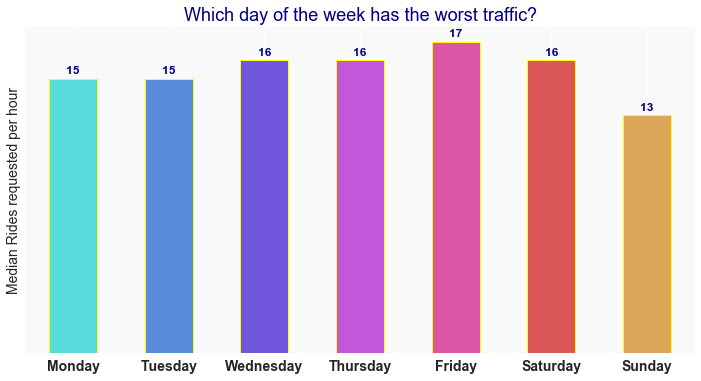

In [56]:
#Create plot. Does Friday have better traffic flow than Sunday?

fig = plt.figure()
labels_list = df_plt2.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = df_plt2.plot(kind='bar', rot = 0, figsize = (12, 6), fontsize = 12, edgecolor='yellow', linewidth=1)
ax.set_xticklabels(weekday_labels, weight='bold')
ax.set_facecolor('#F9F9F9')
ax.get_yaxis().set_ticks([])
annotate_labels(ax, labels_list, **kwargs)

plt.xlabel('')
plt.ylabel('Median Rides requested per hour', fontsize = 14)
plt.tick_params(labelsize=14)
plt.title('Which day of the week has the worst traffic?', fontsize = 18, color='navy')
plt.show()
#plot_url = py.plot_mpl(fig)

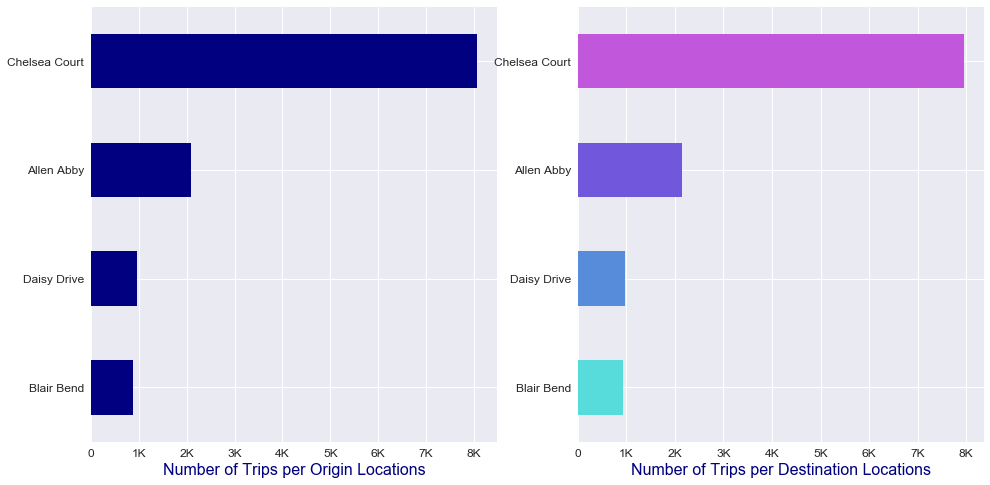

In [57]:
#Calculate top 3 pickup and drop off locations using rider_trips dataset

fig = plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
ax1 = df_rider.start_geo.value_counts(ascending = True).plot(kind = 'barh', color = 'navy')
ax1.set_xticklabels(['0', '1K', '2K', '3K', '4K', '5K', '6K','7K','8K','9K','10K'])
plt.tick_params(labelsize=12)
plt.xlabel('Number of Trips per Origin Locations', fontsize = 16, color='navy')

plt.subplot(1,2,2) #note: it won't account missing values (4% of data)
ax2 = df_rider.end_geo.value_counts(ascending = True).plot(kind = 'barh')
ax2.set_xticklabels(['0', '1K', '2K', '3K', '4K', '5K', '6K','7K','8K','9K','10K'])
plt.tick_params(labelsize=12)
plt.xlabel('Number of Trips per Destination Locations', fontsize = 16, color='navy')

plt.show()

#The top 3 locations for origin and destination are the same: Chelsea Court, Allen Abby and Daisy Drive
#plot_url = py.plot_mpl(fig)

In [58]:
#Percentage of trips represented by the top three origins/destinations:#Percent 
print (df_rider.start_geo.value_counts().head(3).sum()/float(len(df_rider)))
print (df_rider.end_geo.value_counts().head(3).sum()/float(len(df_rider[df_rider.end_geo.isnull() == False])))

0.9271333333333334
0.9232333333333334


In [59]:
#Total pickups or drop-offs within any combination of the top 3 locations: 52691 (87% of the total trips)
len(df_rider[(df_rider.start_geo.isin(['Chelsea Court', 'Allen Abby', 'Daisy Drive']) == True) & \
           (df_rider.end_geo.isin(['Chelsea Court', 'Allen Abby', 'Daisy Drive']) == True)])

52691

In [60]:
#84% of all trips start or finish at Chelsea Court:
len(df_rider[(df_rider.start_geo == 'Chelsea Court') | (df_rider.end_geo == 'Chelsea Court')])/(1.0*len(df_rider)) 

0.84505

In [61]:
#Visualizing the most popularr pickup and dropoff locations

#Define data to plot:
df_plt3 = df_rider.pivot_table('trip_id', aggfunc='count', index='start_geo', columns='end_geo')

In [62]:
df_plt3.shape

(4, 4)

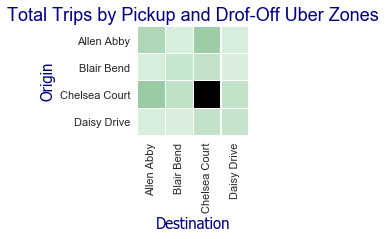

In [63]:

#Visualize the origin versus destination matrix via a heatmap:#Visualiz 

fig = plt.figure(figsize=(2,2))

cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.9, as_cmap=True) #'YlOrRd' #ggplot:'viridis'

sns.heatmap(df_plt3, cmap=cmap, linewidths=0.1, cbar=False)

plt.title('Total Trips by Pickup and Drof-Off Uber Zones', fontsize=18, color='navy')
plt.xlabel('Destination', fontsize=15, fontname='Tahoma', color='navy')
plt.ylabel('Origin', fontsize=15, fontname='Tahoma', color='navy')
plt.tick_params(labelsize=11)
plt.show()

In [64]:
import pandas as pd
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

plotly.offline.init_notebook_mode(connected=True)

data = [
    go.Heatmap(
        z=df['Hour'],
        x=df['start_geo'],
        y=df['end_geo'],
        colorscale='magma',
    )
]

layout = go.Layout(
    title='Locations travelled per hour',
    xaxis = dict(ticks='', nticks=37),
    yaxis = dict(ticks='' )
)

fig = go.Figure(data=data, layout=layout)
#py.iplot(fig, filename='datetime-heatmap')
plotly.offline.iplot(fig)